## IMplementing Linear Regression From Scratch using numpy

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [5]:
class LinearRegression():
    def __init__(self, learningRate, iterations):
        self.learningRate = learningRate
        self.iterations = iterations

    
    def fit(self, X, Y):
        self.m, self.n = X.shape
        self.w = np.zeros(self.n)
        self.b = 0
        self.X  = X
        self.Y = Y

        for i in range(self.iterations):
            self.update_weights()
        
        return self
    
    def update_weights(self):
        Y_pred = self.predict(self.X)
        dw = -2 * ((self.X.T).dot(self.Y - Y_pred)) / self.m
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m  

        self.w = self.w - self.learningRate * dw
        self.b = self.b - self.learningRate * db

        return self
    
    def predict(self, X):
        return X.dot(self.w) + self.b
    


In [18]:
df = pd.read_csv('dataset.csv')
print(df.head())

           Date       Open       High  ...     Close* Adj Close**       Volume
0  Apr 28, 2023  33,797.43  34,104.56  ...  34,098.16   34,098.16  354,310,000
1  Apr 27, 2023  33,381.66  33,859.75  ...  33,826.16   33,826.16  343,240,000
2  Apr 26, 2023  33,596.34  33,645.83  ...  33,301.87   33,301.87  321,170,000
3  Apr 25, 2023  33,828.34  33,875.49  ...  33,530.83   33,530.83  297,880,000
4  Apr 24, 2023  33,805.04  33,891.15  ...  33,875.40   33,875.40  252,020,000

[5 rows x 7 columns]


In [19]:
df = df.drop(columns=['Date', 'Adj Close**'], errors='ignore')

In [20]:
for col in df.columns:
    df[col] = df[col].astype(str).str.replace(',', '', regex=True).astype(float)

In [21]:

print(df.head())

       Open      High       Low    Close*       Volume
0  33797.43  34104.56  33728.40  34098.16  354310000.0
1  33381.66  33859.75  33374.65  33826.16  343240000.0
2  33596.34  33645.83  33235.85  33301.87  321170000.0
3  33828.34  33875.49  33525.39  33530.83  297880000.0
4  33805.04  33891.15  33726.09  33875.40  252020000.0


In [12]:
# df = df.apply(pd.to_numeric, errors='coerce')
# print(df.head())

   Open  High  Low  Close*  Volume
0   NaN   NaN  NaN     NaN     NaN
1   NaN   NaN  NaN     NaN     NaN
2   NaN   NaN  NaN     NaN     NaN
3   NaN   NaN  NaN     NaN     NaN
4   NaN   NaN  NaN     NaN     NaN


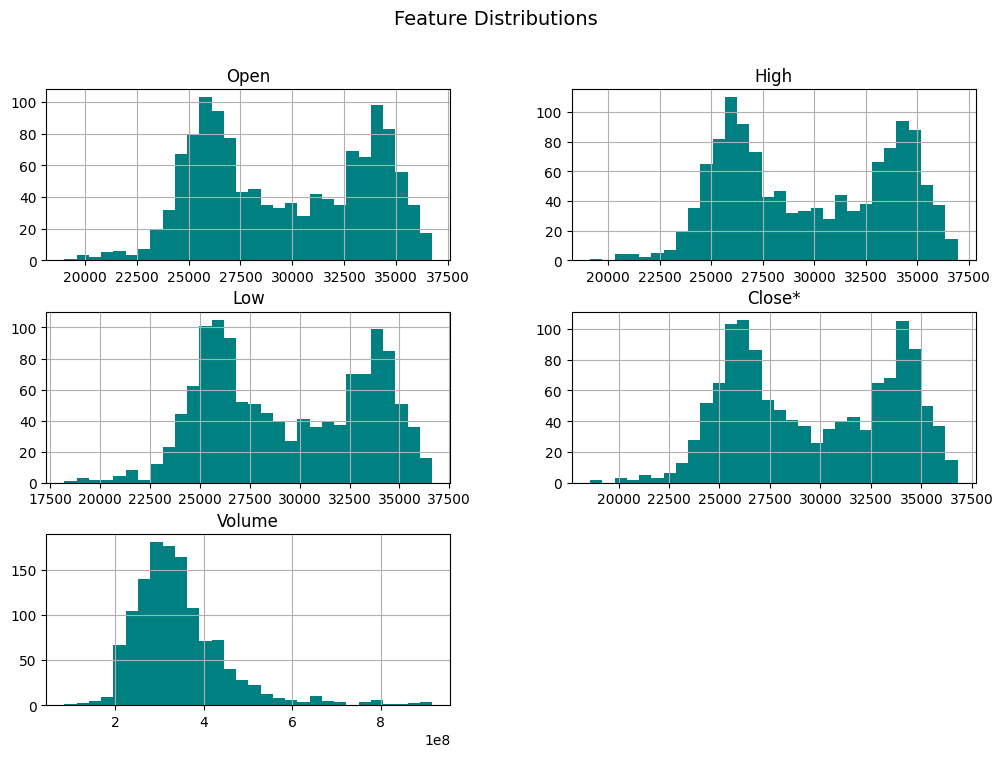

In [22]:
plt.Figure(figsize=(10, 6))
df.hist(bins=30, figsize=(12, 8), color = 'teal')
plt.suptitle('Feature Distributions', fontsize = 14)
plt.show()

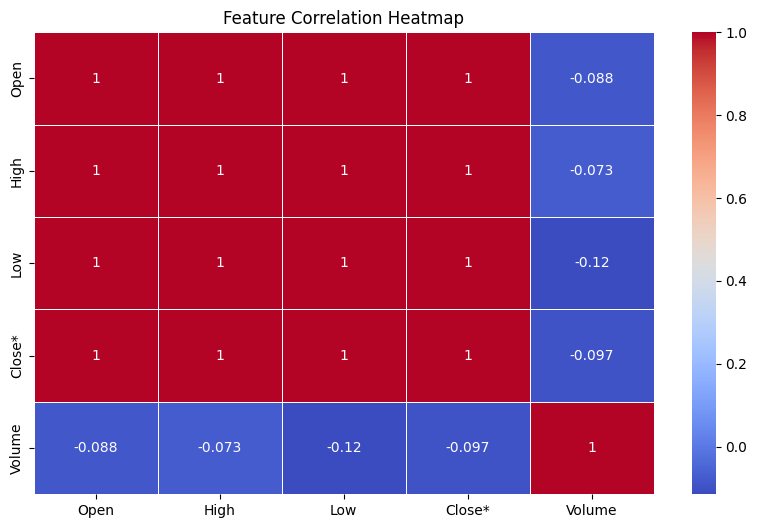

In [23]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [24]:
df['High_Low_Diff'] = df['High'] - df['Low']  # Measures volatility
df['Open_Close_Diff'] = df['Open'] - df['Close*']  # Measures daily trend
df['Log_Volume'] = np.log1p(df['Volume'])  # Log transformation to reduce skewness


In [25]:
df = df.drop(columns=['High', 'Low', 'Open', 'Volume'], errors='ignore')


In [26]:
target_column = 'Close*'
X = df.drop(columns=[target_column])
Y = df[target_column]

In [27]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)  # Normalize feature values
X = pd.DataFrame(X_scaled, columns=X.columns)


In [28]:
print("\nProcessed Features:\n", X.head())


Processed Features:
    High_Low_Diff  Open_Close_Diff  Log_Volume
0       0.166664         0.402982    0.598195
1       0.226068         0.343993    0.584767
2       0.185106         0.647194    0.556653
3       0.152454         0.648441    0.524808
4       0.051552         0.497503    0.454085


In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [31]:
model = LinearRegression(learningRate=0.01, iterations=1000)
model.fit(X_train, Y_train)


In [32]:
Y_pred = model.predict(X_test)

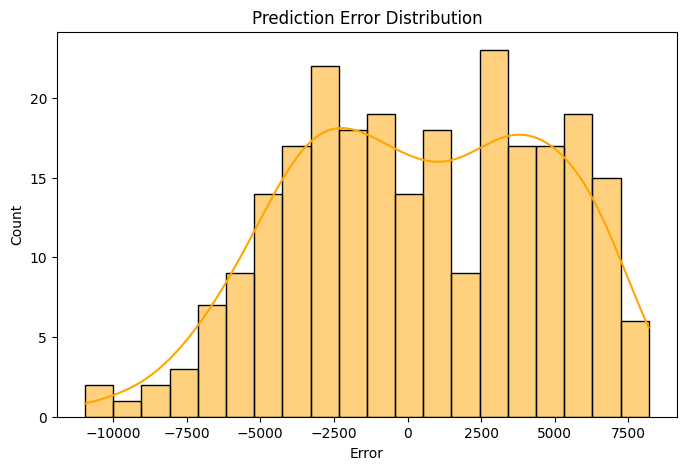

In [33]:
plt.figure(figsize=(8, 5))
sns.histplot(Y_test - Y_pred, bins=20, kde=True, color="orange")
plt.title("Prediction Error Distribution")
plt.xlabel("Error")
plt.show()


In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [35]:
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((Y_test - Y_pred) / Y_test)) * 100

# Accuracy
accuracy = 100 - mape

# Print Metrics
print("\n📊 Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"✅ Model Accuracy: {accuracy:.2f}%")




📊 Model Evaluation Metrics:
Mean Absolute Error (MAE): 3663.2689
Mean Squared Error (MSE): 18376566.6894
Root Mean Squared Error (RMSE): 4286.7898
R² Score: -0.1330
Mean Absolute Percentage Error (MAPE): 12.49%
✅ Model Accuracy: 87.51%


## Polynomial Linear Regression

In [36]:
from sklearn.preprocessing import PolynomialFeatures

In [41]:
degree = 2  
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X_train)  

poly_model = LinearRegression(learningRate=0.01, iterations=1000)
poly_model.fit(X_poly, Y_train)


X_test_poly = poly.transform(X_test)
Y_pred_poly = poly_model.predict(X_test_poly)


mae_poly = mean_absolute_error(Y_test, Y_pred_poly)
mse_poly = mean_squared_error(Y_test, Y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(Y_test, Y_pred_poly)


mape_poly = np.mean(np.abs((Y_test - Y_pred_poly) / Y_test)) * 100

# Accuracy
accuracy_poly = 100 - mape_poly

# Print Results
print("\n📊 Polynomial Regression (Degree {}) Metrics:".format(degree))
print(f"Mean Absolute Error (MAE): {mae_poly:.4f}")
print(f"Mean Squared Error (MSE): {mse_poly:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_poly:.4f}")
print(f"R² Score: {r2_poly:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_poly:.2f}%")
print(f"✅ Polynomial Regression Accuracy: {accuracy_poly:.2f}%")




📊 Polynomial Regression (Degree 2) Metrics:
Mean Absolute Error (MAE): 3645.3241
Mean Squared Error (MSE): 17012774.9731
Root Mean Squared Error (RMSE): 4124.6545
R² Score: -0.0489
Mean Absolute Percentage Error (MAPE): 12.42%
✅ Polynomial Regression Accuracy: 87.58%


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


df['Close_Category'] = pd.qcut(df['Close*'], q=3, labels=["Low", "Medium", "High"])


X_class = df.drop(columns=['Close*', 'Close_Category'])
Y_class = df['Close_Category']

X_train_class, X_test_class, Y_train_class, Y_test_class = train_test_split(X_class, Y_class, test_size=0.2, random_state=42)


multi_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
multi_model.fit(X_train_class, Y_train_class)


Y_pred_class = multi_model.predict(X_test_class)


accuracy_multi = accuracy_score(Y_test_class, Y_pred_class)


print(f"\n✅ Multinomial Logistic Regression Accuracy: {accuracy_multi:.2%}")



✅ Multinomial Logistic Regression Accuracy: 39.68%


/home/prats/.conda/envs/labenv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
